In [191]:
#Importing pandas and nltk
import re
import pandas as pd
!pip install nltk
import nltk
nltk.download('punkt')
from nltk import(word_tokenize,sent_tokenize)
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [192]:
# Define stopwords 
STOPWORDS = stopwords.words('english')
STOPWORDS + ['said']

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [193]:
#Reading the data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [194]:
# Text cleaning function 
def clean_text(text):
    '''
        Function which returns a clean text 
    '''    
    # Lower case 
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d', '', text)
    
    # Replace \n and \t functions 
    text = re.sub(r'\n', ' ', text)
    text = text.strip()
    
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove Stopwords and Lemmatise the data
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in STOPWORDS]
    text = ' '.join(text)
    
    return text


In [195]:
# Create a word cloud function 
def create_wordcloud(text, image_path = None):
    '''
    Pass a string to the function and output a word cloud
    
    ARGS 
    text: The text for wordcloud
    image_path (optional): The image mask with a white background (default None)
    
    '''
    
    text = clean_text(text)
    
    if image_path == None:
        
        # Generate the word cloud
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(text) 
    
    else:
        mask = np.array(Image.open(image_path))
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS,
                    mask=mask,
                    min_font_size = 5).generate(text) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation = 'nearest') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()  

In [196]:
# Function to plot the ngrams based on n and top k value
def plot_ngrams(text, n=2, topk=15):
    '''
    Function to plot the most commonly occuring n-grams in bar plots 
    
    ARGS
    	text: data to be enterred
    	n: n-gram parameters
    	topk: the top k phrases to be displayed
    '''

    text = clean_text(text)
    tokens = text.split()
    
    # get the ngrams 
    ngram_phrases = ngrams(tokens, n)
    
    # Get the most common ones 
    most_common = Counter(ngram_phrases).most_common(topk)
    
    # Make word and count lists 
    words, counts = [], []
    for phrase, count in most_common:
        word = ' '.join(phrase)
        words.append(word)
        counts.append(count)
    
    # Plot the barplot 
    plt.figure(figsize=(10, 6))
    title = "Most Common " + str(n) + "-grams in the text"
    plt.title(title)
    ax = plt.bar(words, counts)
    plt.xlabel("n-grams found in lyrics from 2010")
    plt.ylabel("Ngram frequencies")
    plt.xticks(rotation=90)
    plt.show()

In [197]:
with open('../data/lyrics/lyrics_from_2010.txt') as f:
    text = f.read()
text

'I am this Sahib ji\nLet\'s go all the g\nStill make excuses\nNaina Nawabi Ji\nYou\'ve seen everything.\nStill don\'t understand the gesture.\nI am this Sahib ji\nYes, excuses\nNaina Nawabi ji na na\nunderstand the gesture\n\ngradually\nNanos slowly\nSlowly to Jia\nBhaiyo Ray Sabo\ngradually\nbegana slowly\nyour little bit slowly\nLage Re Sabo\n\nsabo sabo\nThe headlines are in the air.\nmeeting of two hearts.\nThere are prayers in the eyes\nMoment to stop this\n\nHow are you, Huzuri ji?\nShow this lab\nThere was silence, too.\nIt\'s amazing to see it\n\ngradually\nNanos slowly\nSlowly to Jia\nBhaiyo Ray Sabo\ngradually\nbegana slowly\nyour little bit slowly\nLage Re Sabo\n\nSabo Sabo slowly\nNanos slowly\nSlowly to Jia\nBhaiyo Ray Sabo\ngradually\nbegana slowly\nyour little bit slowly\nLage Re Sabo\nSabo Sabo Hi Saibo. \nBird Bird and Son Bird\nBhadia Bhadia Bhai Bahut Bhadiya\nSaya Saya O More Saya\nAja Re Aja Hold Mori Bayaiya\nHi Saya Saya O More Saya\nAja Re Aja Hold Mori Bayaiya\

In [198]:
# Clen the text 
cleaned_data = clean_text(text)

In [199]:
if "mehbooba" in cleaned_data: 
    cleaned_data = cleaned_data.replace("mehbooba", "mehboob")

In [200]:
cleaned_data

'sahib ji let go g still make excuse naina nawabi ji youve seen everything still dont understand gesture sahib ji yes excuse naina nawabi ji na na understand gesture gradually nanos slowly slowly jia bhaiyo ray sabo gradually begana slowly little bit slowly lage sabo sabo sabo headline air meeting two heart prayer eye moment stop huzuri ji show lab silence amazing see gradually nanos slowly slowly jia bhaiyo ray sabo gradually begana slowly little bit slowly lage sabo sabo sabo slowly nanos slowly slowly jia bhaiyo ray sabo gradually begana slowly little bit slowly lage sabo sabo sabo hi saibo bird bird son bird bhadia bhadia bhai bahut bhadiya saya saya saya aja aja hold mori bayaiya hi saya saya saya aja aja hold mori bayaiya today sunday play saturday game mail mine bird bird bird bhadia bhadia bhai bahut bhadiya old woman tease old woman let give powder poison love wall middle whose point view bird bird son bird bhadia bhadia bhai bahut bhadiya waist blistered thats curly hair didn

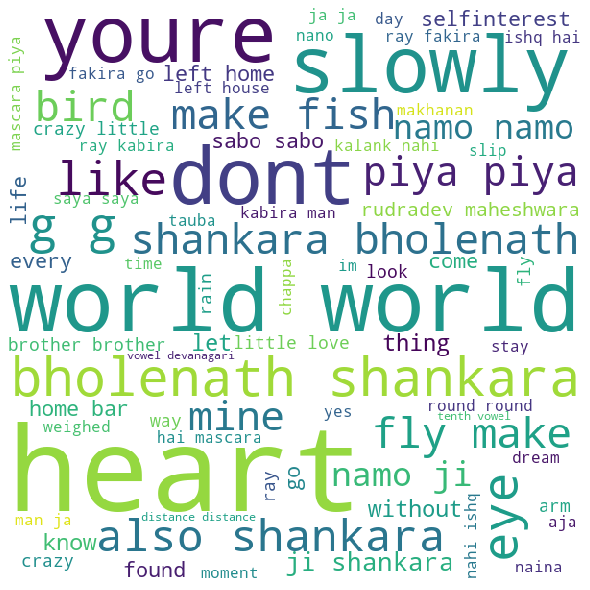

In [201]:
create_wordcloud(cleaned_data)

In [202]:
from collections import Counter

words = cleaned_data.split()
wordCount = dict(Counter(words))

In [203]:
{k: v for k, v in sorted(wordCount.items(), key=lambda item: item[1], reverse=True)}

{'world': 35,
 'shankara': 35,
 'g': 17,
 'heart': 17,
 'namo': 16,
 'dont': 14,
 'slowly': 14,
 'youre': 14,
 'fly': 14,
 'piya': 14,
 'bholenath': 14,
 'ji': 13,
 'ray': 13,
 'sabo': 12,
 'eye': 12,
 'left': 12,
 'like': 11,
 'also': 11,
 'go': 10,
 'make': 10,
 'crazy': 10,
 'bird': 9,
 'fish': 9,
 'ask': 9,
 'little': 8,
 'mine': 8,
 'round': 8,
 'ja': 8,
 'let': 7,
 'love': 7,
 'know': 7,
 'without': 7,
 'thing': 7,
 'whats': 7,
 'distance': 7,
 'bhadia': 6,
 'saya': 6,
 'brother': 6,
 'selfinterest': 6,
 'come': 6,
 'every': 6,
 'life': 6,
 'found': 6,
 'home': 6,
 'bar': 6,
 'jai': 6,
 'rudradev': 6,
 'maheshwara': 6,
 'gradually': 5,
 'look': 5,
 'way': 5,
 'house': 5,
 'arm': 5,
 'rain': 5,
 'mascara': 5,
 'ishq': 5,
 'naina': 4,
 'yes': 4,
 'air': 4,
 'moment': 4,
 'aja': 4,
 'chappa': 4,
 'tauba': 4,
 'weighed': 4,
 'stay': 4,
 'kabira': 4,
 'man': 4,
 'fakira': 4,
 'slip': 4,
 'im': 4,
 'dream': 4,
 'day': 4,
 'ever': 4,
 'makhanan': 4,
 'hundred': 4,
 'time': 4,
 'kalank':

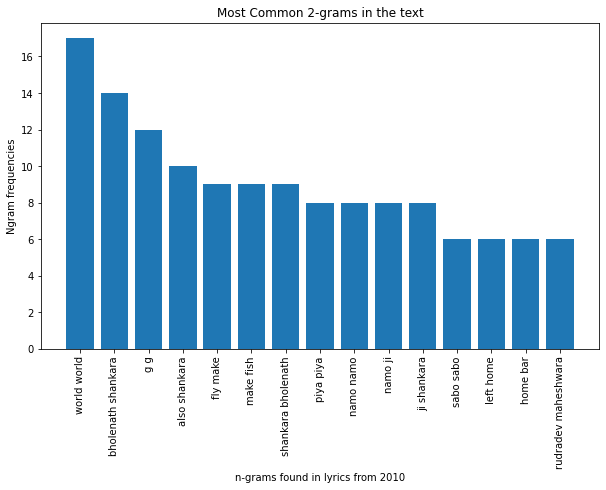

In [204]:
plot_ngrams(cleaned_data, n=2, topk=15)

In [ ]:
कहीं पे हों रातें
कहीं पे सवेरे
आवारगी ही रही साथ मेरे
ठहर जा, ठहर जा
ये कहती है तेरी नज़र

क्या हाल हो गया है ये मेरा
आँखें मेरी हर जगह
ढूंढ़ें तुझे बेवजह
ये मैं हूँ या कोई और है मेरी तरह

कैसे हुआ, कैसे हुआ
तू इतना ज़रूरी कैसे हुआ
कैसे हुआ, कैसे हुआ
तू इतना ज़रूरी कैसे हुआ
कैसे हुआ, कैसे हुआ
तू इतना ज़रूरी कैसे हुआ